# Case Study : Spam or Ham Prediction -SMS/Email Classifier

## 1. Importing Necessary Libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# removing warning
import warnings
warnings.filterwarnings("ignore")

## 2. Reading and Understanding the Data 

In [3]:
# data reading
message =  pd.read_csv('spam.csv', encoding = "ISO-8859-1")

# for preventing data loss copy to another variable
df = message.copy()

In [4]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3383,spam,FREE MSG:We billed your mobile number by mista...,NaN,NaN,NaN
3200,ham,Nice.nice.how is it working?,NaN,NaN,NaN
2653,ham,Sorry da:)i was thought of calling you lot of ...,NaN,NaN,NaN
3118,ham,Stop knowing me so well!,NaN,NaN,NaN
4100,spam,GSOH? Good with SPAM the ladies?U could b a ma...,NaN,NaN,NaN
5427,spam,Santa Calling! Would your little ones like a c...,NaN,NaN,NaN
2875,ham,Fuck cedar key and fuck her (come over anyway ...,NaN,NaN,NaN
3642,ham,"Sorry, left phone upstairs. OK, might be hecti...",NaN,NaN,NaN
393,ham,Yes i think so. I am in office but my lap is i...,NaN,NaN,NaN
3366,ham,Hey what are you doing. Y no reply pa..,NaN,NaN,NaN


In [5]:
# shape of data
df.shape

(5572, 5)

In [6]:
# describe the dataset
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [7]:
# information of data
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [8]:
# checking missing value
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# checking the total no of datatype columns

print("Total no of int64 dtype columns , ",df.select_dtypes(include=["int64"]).columns.shape[0])
print("Total no of float64 dtype columns , ",df.select_dtypes(include=["float64"]).columns.shape[0])
print("Total no of object dtype columns , ",df.select_dtypes(include=["object"]).columns.shape[0])

Total no of int64 dtype columns ,  0
Total no of float64 dtype columns ,  0
Total no of object dtype columns ,  5


`Insight`

- This dataset contains the : **5572 (Rows) and 5 (Columns)**
- Three columns **unnamed1** , **unnamed2**, **unnamed3** contains null values.
* we need to use **first  (v1)** column for the **Target** purpose, Another column for the **Text** column is the string of text.
* Total no of int64 dtype columns ,  **0**
* Total no of float64 dtype columns ,  **0**
* Total no of object dtype columns ,  **5**

## 3. Data Cleaning and Data Handling

### 3.1 Data Checking 

3.1.1 Misssing value in each columns

In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

3.1.2 Missing value percentage in each columns

In [11]:
(df.isnull().sum()) *100 / len(df)

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

3.1.3 Duplicate Value Checking

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
#Create a dummy variable for duplicate check
df_dup = df

#Checking for duplicates and dropping entire duplicate row if any have 
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape

(5169, 5)

`insight`

- **Duplicates are present**  in dataframe very small quantity **( 403 )** 
- Original Rows in DataFrame is : **5572 (Rows) and 5 (Columns)**
- After Checking duplicate Unique rows is : **5169 (Rows) and 5 (Columns)**    
- **Columns name is not in Proper Manner**. For better Understanding we **rename** it.

### 3.2 Data Cleaning  

In [14]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)

In [15]:
df.sample(5)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2863,ham,What I'm saying is if you haven't explicitly t...,NaN,NaN,NaN
3577,ham,They said Ì_ dun haf passport or smth like dat...,NaN,NaN,NaN
5517,ham,Miles and smiles r made frm same letters but d...,NaN,NaN,NaN
1836,ham,Are you wet right now?,NaN,NaN,NaN
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,NaN,NaN,NaN


In [16]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [17]:
df.sample(5)

,Target,Text
5466,spam,http//tms. widelive.com/index. wml?id=820554ad...
5296,ham,Are u coming to the funeral home
795,ham,it's really getting me down just hanging around.
3356,ham,"Brainless Baby Doll..:-D;-), vehicle sariyag d..."
5348,ham,Do I? I thought I put it back in the box


In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

`insight`

- After removing duplicate rows Shape of Dataframe is **5169 rows × 2 columns**.
- Hence Column name in proper manner. 
- Predictor variable are in **categorical variable**. So we need to map **Spam = 1** and **Ham = 0** using LabelEncoder. 


In [20]:
df.sample(5)

,Target,Text
4328,ham,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...
5570,ham,The guy did some bitching but I acted like i'd...
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...
900,ham,Probably money worries. Things are coming due ...
455,ham,Si si. I think ill go make those oreo truffles.


## 4. Performing EDA

- Now we need to convert Categorical values to Numerical columns. Hence we use Label Encoder 
- Spam = 1, Ham = 0
- Visualizing the Targer Column

#### 4.1 Label Encoding ( Converting categorical column to Numerical columns )

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df.Target = encoder.fit_transform(df["Target"])

df.Target.head(5)

0    0
1    0
2    1
3    0
4    0
Name: Target, dtype: int32

#### 4.2 Data Imbalanced Check

In [22]:
# unique value in target column
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

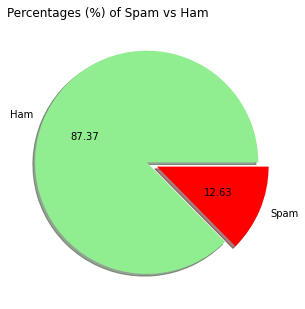

In [23]:
# Visualization of target variable using Pie Plot

plt.figure("figsize", (5,9))
plt.title("Percentages (%) of Spam vs Ham", color="k", loc="left", )
plt.pie(df.Target.value_counts(), labels=["Ham","Spam"], colors=[ "#90ee90","red"], autopct="%0.2f", explode=(0, 0.1), shadow=True)
plt.show()

`insight`

- In Pie plot, Clearly shows that the **data is imbalanced.**
- Percentages of **Ham messages is more than Spam messages**.

#### 4.3  Feature Engineering

- Need of Selection of **words**, **senetences**, **charactres** for Better Understanding of Text Analysis.
- Making new feature of groups of **words**, **senetences**, **charactres**.

In [24]:
import nltk
!pip install nltk

In [25]:
# this is required for the tokenize funtion
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
# creating features of words, sentences, characters

# Number of characters
df["num_characters"] = df["Text"].apply(len)

# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

# num of sentences
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [28]:
# describe the dataframe numrical columns
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455407,1.961308
std,0.332253,58.236293,13.322448,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [29]:
# Seperate Analysis of Spam and Ham differently

In [30]:
# Describe of Spam and Ham

# Ham
ham_desc = df[df["Target"] == 0] [["num_characters","num_words","num_sentences"]]
ham_desc.describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Spam
spam_desc = df[df["Target"] == 1] [[ "num_characters","num_words","num_sentences" ]]

print(spam_desc.describe())

       num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.969372
std         30.137753    7.008418       1.488910
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000


##### Distribution of spam and ham characters and words

- How num_characters related to the target variable ? 
- How num_words related to the target variable ?
- How num_sentences related to the target variable ?

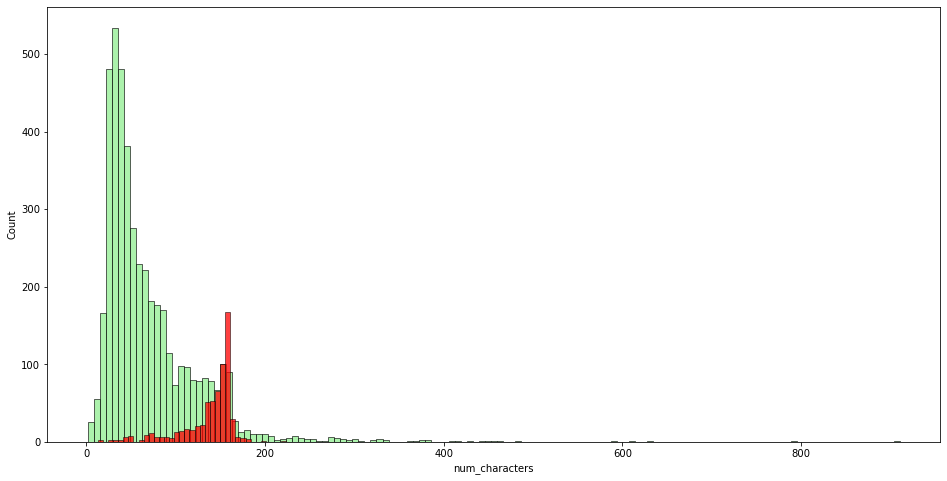

In [32]:
# visualization of spam and ham character using hist plot

# Spam or Ham distribution with respect to the num_characters
plt.figure(figsize=(16,8))
sns.histplot(df[df["Target"]==0]["num_characters"], color="#90ee90")
sns.histplot(df[df["Target"]==1]["num_characters"], color="red")
plt.show()

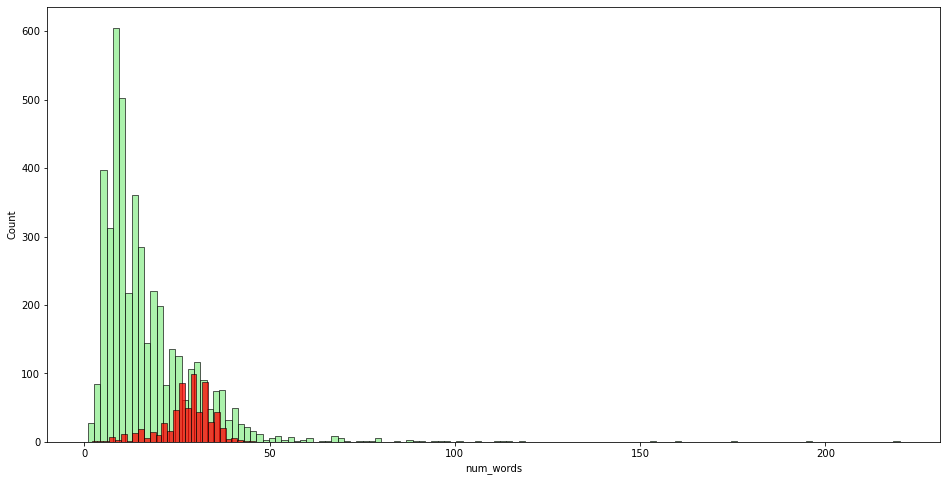

In [33]:
# Spam or Ham distribution with respect to the num_words
plt.figure(figsize=(16,8))
sns.histplot(df[df["Target"]==0]["num_words"], color="#90ee90")
sns.histplot(df[df["Target"]==1]["num_words"], color="red")
plt.show()

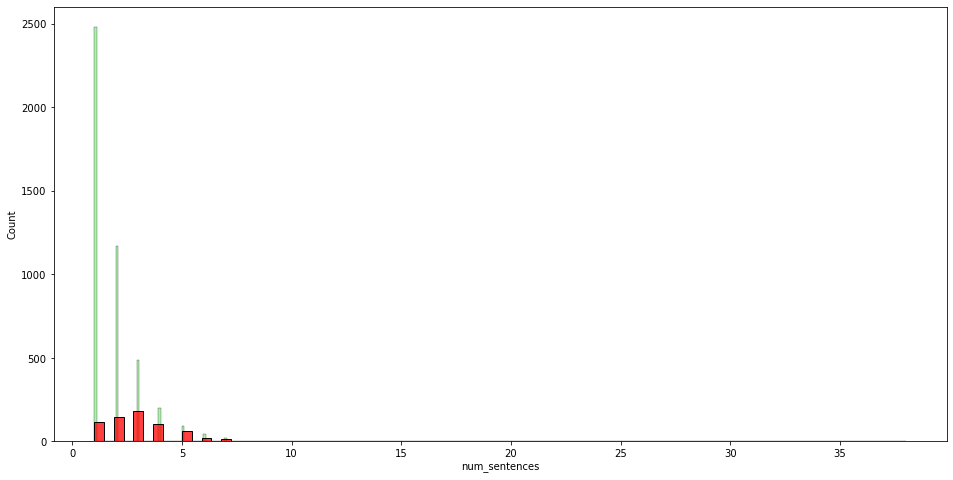

In [34]:
# Spam or Ham distribution with respect to the num_sentecnes
plt.figure(figsize=(16,8))
sns.histplot(df[df["Target"]==0]["num_sentences"], color="#90ee90")
sns.histplot(df[df["Target"]==1]["num_sentences"], color="red")
plt.show()

`insight`

- Histogram shows that Ham words and character than spam
- From the above plot, We can say the Spam messages are sort.  
- Plot shows the **outliers are presents** in the features.

#### 4.4 Outlier Detection 

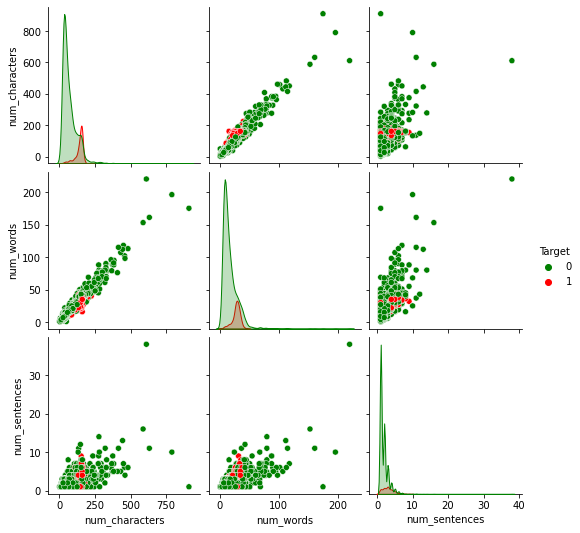

In [35]:
# pairplot to understand the features

sns.pairplot(df, hue="Target",palette=["green", "red"])
plt.show()

`insight`

- Clear presence of outliers in our data. Also since each of those attributes specify length of a given text, they are likely to be correlated as well.

hence we can treat our outliers and drop beyond a certain limit.

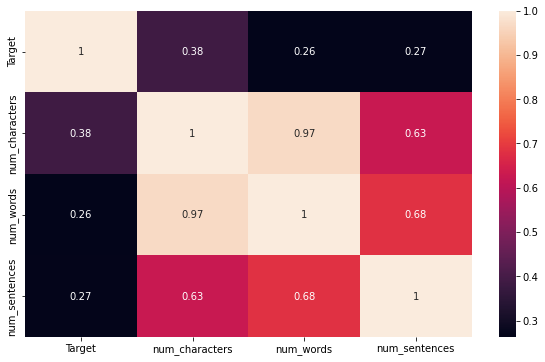

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

`ìnsight`

- Multicollinearity are present between **num_words and num_characters**. Same for **num_words and num_sentences** 

- **num_characters with target** is very less correlation.

- So we need to consider just one of these three - preferrably num_characters for our model!

## 5. Data Preprocessing

The **data or text cleaning** process NLP is **mandatory before modelling**. As computers dont understand the texts/English language unlike humans. We need to convert them a fomat which can be understood by machines

Text Preprocessing Steps -

- Lowercase conversion
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

`Stopwords` are frequently occurring words ( such as few, is , an the, etc). These words hold meaning in sentence structure, but do not contribute much to language processing. For the purpose of removing redundancy in our processing, I am removing those. So we need to use NLTK library.

`Tokenization` is breaking the raw text into small chunks. It breaks the raw text into words, sentences called tokens.

### Stemming is computationally much faster than Lemmatization, however performance and understanding is better for Lemmatization. We choose Stemming here and will see how the models perform.

In [37]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [38]:
import nltk
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [39]:
ps = PorterStemmer()

# Creating a funciton name transfrom_text
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #retaining onl	x numbers and alphabets
    x = []
    for i in text:
        if i.isalnum():
            x.append(i)
    
    #clone cop	x of list 	x
    text = x[:]
    x.clear()
    
    #stopwords removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)  
            
    text = x[:]
    x.clear()
    
    for i in text:
        x.append(ps.stem(i))
        
    return " ".join(x)

In [40]:
# # testing code - 1
# transform_text("HI, how are you,and What is  %% ** your age // ?")

# # testing code - 2
# transform_text("Your car is very amazing, Can I buy it?, is Your car price 7000 $? ")

# # test code 
# ps = PorterStemmer()
# print(ps.stem("negligible"))

# print(ps.stem("starting"))
# print(ps.stem("started"))
# print(ps.stem("starting"))


In [41]:
df["transformed_text"] = df["Text"].apply(transform_text)

In [42]:
df.sample(5)

,Target,Text,num_characters,num_words,num_sentences,transformed_text
669,0,Did u receive my msg?,21,6,1,u receiv msg
4944,0,Anyway I don't think I can secure anything up ...,107,25,1,anyway think secur anyth lem know want drive s...
5096,0,But i'm really really broke oh. No amount is t...,71,21,2,realli realli broke oh amount small even lt gt
4623,0,Jus finish blowing my hair. U finish dinner al...,52,11,2,ju finish blow hair u finish dinner alreadi
5098,1,TheMob>Hit the link to get a premium Pink Pant...,149,33,2,themob hit link get premium pink panther game ...


### 5.1 Creating wordcloud of Words

In [43]:
# wordcolud for spam
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df["Target"]==1] ['transformed_text'].str.cat(sep=" "))

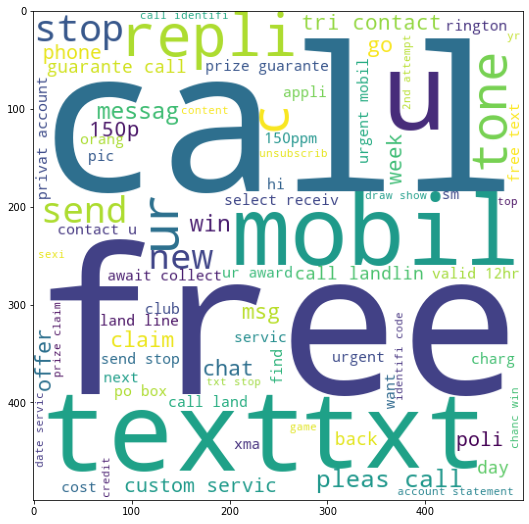

In [45]:
plt.figure("figure" , (16,9))
plt.imshow(spam_wc)

`insight`

- most of the spam words are "free", "call","text" and etc
- Most occuring spam words are shown in the wordcloud image

In [46]:
# wordcolud for ham
ham_wc = wc.generate(df[df["Target"]==0] ['transformed_text'].str.cat(sep=" "))

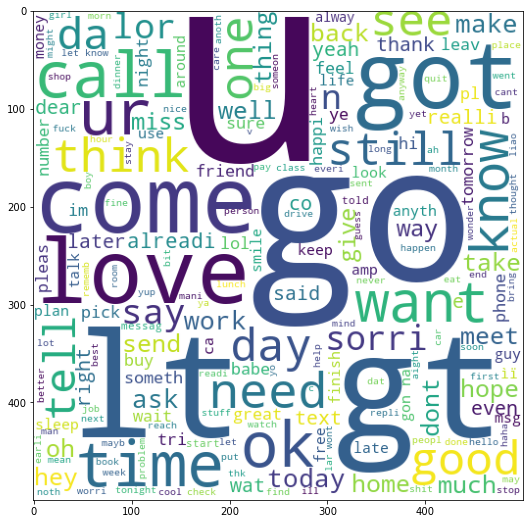

In [47]:
plt.figure("figure" , (16,9))
plt.imshow(ham_wc)

`insight`

- most of the ham words are "go", "come","call","it" and etc
- Most occuring ham words are shown in the wordcloud image

In [48]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
df[df["Target"]==1].sample(5)

,Target,Text,num_characters,num_words,num_sentences,transformed_text
2524,1,FREE entry into our å£250 weekly comp just sen...,100,21,2,free entri weekli comp send word win 80086 18 c
830,1,U have a secret admirer. REVEAL who thinks U R...,147,32,6,u secret admir reveal think u r special call o...
1572,1,Ur cash-balance is currently 500 pounds - to m...,145,23,2,ur current 500 pound maxim ur send go 86688 cc...
2118,1,U can WIN å£100 of Music Gift Vouchers every w...,160,27,2,u win music gift voucher everi week start txt ...
384,1,Double mins and txts 4 6months FREE Bluetooth ...,149,25,3,doubl min txt 4 6month free bluetooth orang av...


## FOR SPAM

In [50]:
# creating a empty list for appending the words in lists.

spam_corpus = []

for msg in df[df["Target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [51]:
len(spam_corpus)


9939

In [52]:
# most coomon words put into dataframe
from collections import Counter
top30 = pd.DataFrame(Counter(spam_corpus).most_common(30))
top30

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


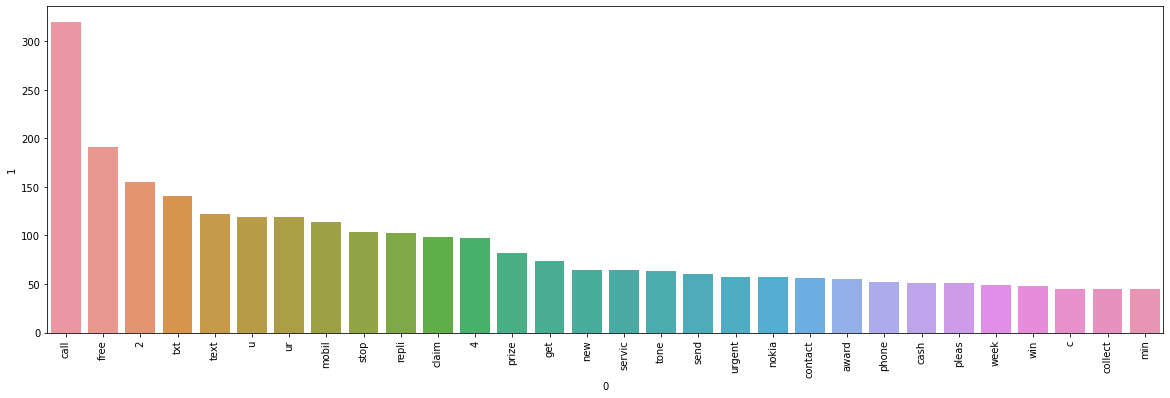

In [53]:
# visualize the words  
plt.figure(figsize=(20,6))
plt.xticks(rotation="vertical")
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.show()

`insight`

- in Spam, **count of spam word is low as compared to ham**
- **call** are present in large amount compared to other words.
- **approximately 9939** words in spam.

## FOR HAM

In [54]:
# creating a empty list for appending the words in lists.

ham_corpus = []

for msg1 in df[df["Target"]==0]["transformed_text"].tolist():
    for word1 in msg1.split():
        ham_corpus.append(word1)
    

In [55]:
len(ham_corpus)


35402

In [56]:
# most coomon words put into dataframe
from collections import Counter
top30_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
top30_ham

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


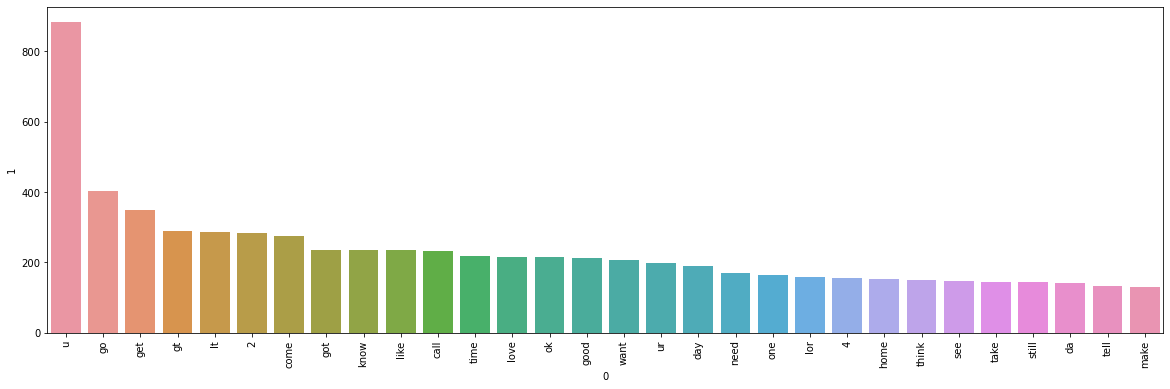

In [57]:
# visualize the words  
plt.figure(figsize=(20,6))
plt.xticks(rotation="vertical")
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.show()

`insight`

- in Ham, **most words are present** in the ham as compared to spam.
- **u** are present in very large compared to other words.
- **approximately 10000** words in ham.

# ----------------------------------------------------------------------------------------------------------

### 5.2 Vectorization

Before Further proceed We need to vectorize the Data ie. conversion of text data to vectors

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### 5.2.1 Vectorization of data using -  CountVectorizer

In [59]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer()
# X2 = cv.fit_transform(df["transformed_text"]).toarray()
# y2 = df["Target"].values


# print("Value of X2 : ", X2)
# print("-"*20)
# print("Value of y2 : ", y2)
# print("-"*30)
# print("Shape of X2: ", X2.shape)
 

#### 5.2.2 Vectorization of data using - TfidfVectorizery

In [60]:

# tfidfv = TfidfVectorizer(max_features=3000)
# X2 = tfidfv.fit_transform(df["transformed_text"]).toarray()
# y2 = df["Target"].values


# print("Value of X2 : ", X2)
# print("-"*20)
# print("Value of y2 : ", y2)
# print("-"*30)
# print("Shape of X2: ", X2.shape)


#### Using MinMax scaler

In [61]:

# tfdifv = TfidfVectorizer(max_features=3000)
# X = tfdifv.fit_transform(df["transformed_text"]).toarray()

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# y= df["Target"].values

In [62]:
# from sklearn.preprocessing import MinMaxScaler

# X = tfidfv.fit_transform(df["transformed_text"]).toarray()
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


# # It is commented due to ineffective acuuracy and precision

**Apending num_character col to X**

In [63]:
tfdifv = TfidfVectorizer(max_features=3000)
X = tfdifv.fit_transform(df["transformed_text"]).toarray()

In [64]:
X = np.hstack((X, df["num_characters"].values.reshape(-1,1)))
y = df.Target.values

# ----------------------------------------------------------------------------------------------------------

### 5.3 Spliting Datset into training and testing set

In [66]:
#y to contain target variable, dependent variable
y = y

# all remaining varible also our independent varibles
X = X

##### now creating  train test data frame with 80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)



# inspent the independent variable
print("Shape of X : ", X.shape)

# inspent the dependent variable
print("Shape of y : ", y.shape)

Shape of X :  (5169, 3001)
Shape of y :  (5169,)


`Insight`

- independent variable name and dependent variable name replaced into X, y for CountVectorizer
- Dataset is divided into **80:20** ratio

# ----------------------------------------------------------------------------------------------------------

## 6. Modeling 

We will use some different algorithmas
- GaussianNB, 
- MultinomialNB, 
- BernoulliNB 

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

##### Model 1 - NaiveBayes  ( GaussianNB )

In [68]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred1 = gnb.predict(X_test)
y_pred1

# evaluating metrics
print(accuracy_score(y_test, y_pred1 ))
print()
print(confusion_matrix(y_test, y_pred1))
print()
print(precision_score(y_test, y_pred1))

0.8771760154738878

[[784 105]
 [ 22 123]]

0.5394736842105263


##### Model 2 - NaiveBayes  ( MultinomialNB )

In [69]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# prediction

y_pred2 = mnb.predict(X_test)
y_pred2

# evaluating metrics
print(accuracy_score(y_test, y_pred2 ))
print()
print(confusion_matrix(y_test, y_pred2))
print()
print(precision_score(y_test, y_pred2))

0.941972920696325

[[888   1]
 [ 59  86]]

0.9885057471264368


##### Model 3  - NaiveBayes  ( BernualliNB ) 

In [70]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# prediction

y_pred3 = bnb.predict(X_test)
y_pred3

# evaluating metrics
print(accuracy_score(y_test, y_pred3 ))
print()
print(confusion_matrix(y_test, y_pred3))
print()
print(precision_score(y_test, y_pred3))

0.9729206963249516

[[884   5]
 [ 23 122]]

0.9606299212598425


`insight`

- There are three model of NaiveBayes, (**GaussianNB**,   **MultinomialNB**,  **BernualliNB**). 
- **Tfidf >** **MulitnomialNB** is better than other models.
- In this case **Precision is more significant** than accuracy score because the **data is imbalanced**.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc =  BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [73]:
#  DICTIONARY OF CLASSIFIERS

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [74]:
import sklearn.metrics as metrics

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #train_accuracy = accuracy_score(X_train, y_train)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    
    return accuracy,precision,f1,recall

In [75]:
#train_classifier(svc,X_train,y_train,X_test,y_test)

In [76]:
#train_classifier(etc,X_train,y_train,X_test,y_test)

##### Now we make a data frame of model name with evaluation metrics


In [77]:
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision, f1_score, recall_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("\nFor classifier ",name, ":")

    print("  Test_Accuracy - ",current_accuracy)
    print("  Precision - ", current_precision)
    print("  F1 Score - ", f1_score)
    print("  Recall - ",recall_score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(f1_score)
    recall_scores.append(recall_score)


For classifier  SVC :
  Test_Accuracy -  0.8597678916827853
  Precision -  0.0
  F1 Score -  0.0
  Recall -  0.0

For classifier  KN :
  Test_Accuracy -  0.9274661508704062
  Precision -  0.7868852459016393
  F1 Score -  0.7191011235955056
  Recall -  0.6620689655172414

For classifier  NB :
  Test_Accuracy -  0.941972920696325
  Precision -  0.9885057471264368
  F1 Score -  0.7413793103448276
  Recall -  0.593103448275862

For classifier  DT :
  Test_Accuracy -  0.9303675048355899
  Precision -  0.8230088495575221
  F1 Score -  0.7209302325581395
  Recall -  0.6413793103448275

For classifier  LR :
  Test_Accuracy -  0.9555125725338491
  Precision -  0.9090909090909091
  F1 Score -  0.8270676691729324
  Recall -  0.7586206896551724

For classifier  RF :
  Test_Accuracy -  0.971953578336557
  Precision -  0.9833333333333333
  F1 Score -  0.890566037735849
  Recall -  0.8137931034482758

For classifier  AdaBoost :
  Test_Accuracy -  0.9661508704061895
  Precision -  0.9104477611940298


In [78]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Recall':recall_scores, 'F1_Score':f1_scores,'Test_Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [79]:
performance_df

,Algorithm,Recall,F1_Score,Test_Accuracy,Precision
2,NB,0.593103,0.741379,0.941973,0.988506
5,RF,0.813793,0.890566,0.971954,0.983333
8,ETC,0.862069,0.909091,0.975822,0.961538
10,XGB,0.827586,0.879121,0.968085,0.937500
9,GBDT,0.703448,0.800000,0.950677,0.927273
6,AdaBoost,0.841379,0.874552,0.966151,0.910448
4,LR,0.758621,0.827068,0.955513,0.909091
7,BgC,0.868966,0.863014,0.961315,0.857143
3,DT,0.641379,0.720930,0.930368,0.823009
1,KN,0.662069,0.719101,0.927466,0.786885


## - BEST PERFORMANCE AMOUNG ALL CONSIDERING PRECISION - NB and RF
### - Overall best performance - NB, ETC  and RF

#### Visualize the Precision Accuracy of model

In [80]:
# changing from  wide format to long format
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

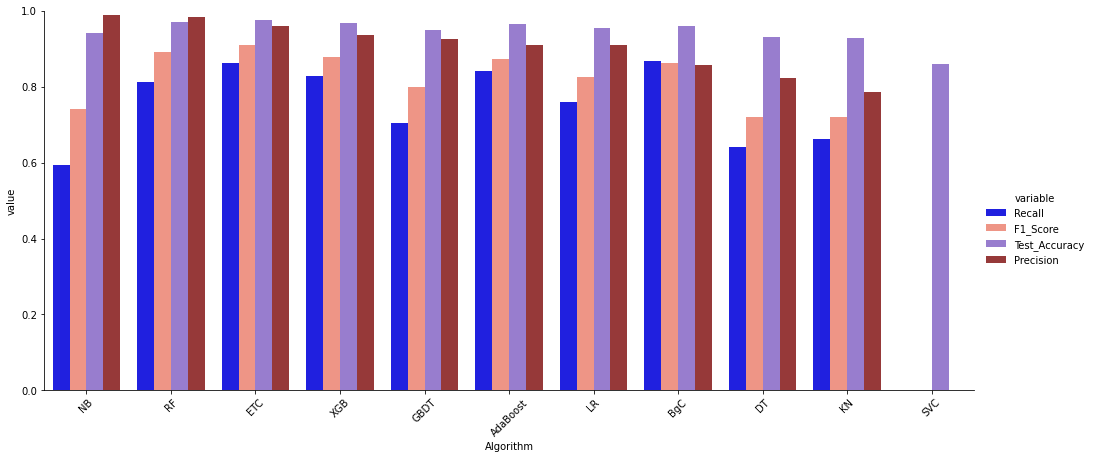

In [81]:
cols = cols= ['blue','#ff8975', 'mediumpurple','brown'] 
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=6, palette = cols, aspect=2.3)

plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

### Now imporve the model using some techniques

1. Change the max_features parameter of Tfidf to 1000 , 2000 , 3000
2. Try min_max_scaler 
3. Using Voting and stacking Classifiers (combination of best performing models)

In [82]:
# max_accuracy at 3000

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),
                        'Accuracy_max':accuracy_scores,
                        'Precision_max':precision_scores}).sort_values('Precision_max',ascending=False)

temp_df = pd.DataFrame({"Algorithm": clfs.keys(),
                       "Accuracy_scaling_at_3000":accuracy_scores,
                       "Precision_scaling_at_3000":precision_scores}).sort_values("Precision_scaling_at_3000", ascending=False)

In [83]:
new_scaled_df = performance_df.merge(temp_df, on="Algorithm")  

In [84]:
new_scaled_df

,Algorithm,Recall,F1_Score,Test_Accuracy,Precision,Accuracy_scaling_at_3000,Precision_scaling_at_3000
0,NB,0.593103,0.741379,0.941973,0.988506,0.941973,0.988506
1,RF,0.813793,0.890566,0.971954,0.983333,0.971954,0.983333
2,ETC,0.862069,0.909091,0.975822,0.961538,0.975822,0.961538
3,XGB,0.827586,0.879121,0.968085,0.937500,0.968085,0.937500
4,GBDT,0.703448,0.800000,0.950677,0.927273,0.950677,0.927273
5,AdaBoost,0.841379,0.874552,0.966151,0.910448,0.966151,0.910448
6,LR,0.758621,0.827068,0.955513,0.909091,0.955513,0.909091
7,BgC,0.868966,0.863014,0.961315,0.857143,0.961315,0.857143
8,DT,0.641379,0.720930,0.930368,0.823009,0.930368,0.823009
9,KN,0.662069,0.719101,0.927466,0.786885,0.927466,0.786885


`insight`

- No major improvement after scaling the features. But after setting max_feature = 3000, 

### 3. Now we try Voting and Stacking for better improvement

##### Voting Classifier with KN, RF, ETC

In [85]:
from sklearn.ensemble import VotingClassifier


knc = KNeighborsClassifier()
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [86]:
voting = VotingClassifier(estimators=[("knc", knc), ("mnb", mnb),("etc", etc)], voting="soft")

In [87]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knc', KNeighborsClassifier()),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy 0.965183752417795
Precision 1.0
[[889   0]
 [ 36 109]]


`insight`

- False Positive is 0

- Accuracy 0.965183752417795
- Precision 1.0

##### Stacking Classifier

In [90]:
from sklearn.ensemble import StackingClassifier

In [89]:
estimators =[("knc", knc), ("mnb", mnb),("etc", etc)]

final_estimators = RandomForestClassifier()

In [91]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimators)
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('knc', KNeighborsClassifier()),
                               ('mnb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [92]:
y_pred = clf.predict(X_test)
print("Accuracy at stacing ", accuracy_score(y_test, y_pred))
print("Precision at Stacing", precision_score(y_test, y_pred))


Accuracy at stacing  0.9748549323017408
Precision at Stacing 0.9047619047619048


`insight`

- No major improvement Accuracy and Precision in Stacking

## Final Model

Hence we will use **Voting Classifier** as Final Model as it has best combination of precision and accuracy


-  Accuracy  : 0.9719
- Precision : 1

In [ ]:
# Saving Our Model 
import pickle

pickle.dump(tfidfv, open("vectorizer.pkl","wb"))
pickle.dump(voting, open("model.pkl","wb"))

## 10. Report

Out of multiple classifers tried, we finally went with **Voting classifier** based on the **evaluation metrics : Precision and Accuracy** (on test data)


Note :
For us, a higher value of False Positive will be the worst case scenario as non-spam emails getting classified as "Spam" can result in real damage. Hence in order to ensure minimum False Positive implies that we need to have a Higher Precision value and that's what makes Precision the most important Evaluation Metric for us

**Hence we went ahead with the model with offered 100% Precision score with 97.19% Accuracy o our test data!**